# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [38]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [39]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

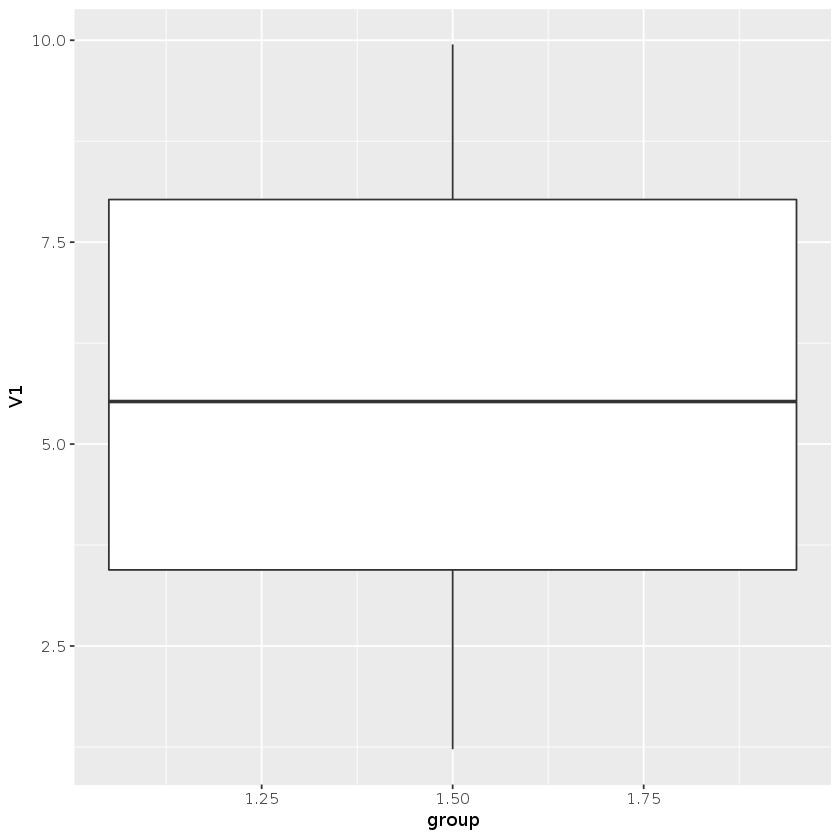

In [40]:
library(ggplot2)
ggplot(df1, aes(x=group, y=V1)) + 
  geom_boxplot()

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [41]:
reg1 <- lm(data=df1, response ~ V1 )
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [42]:
require(gvlma)
gvmodel <- gvlma(reg1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



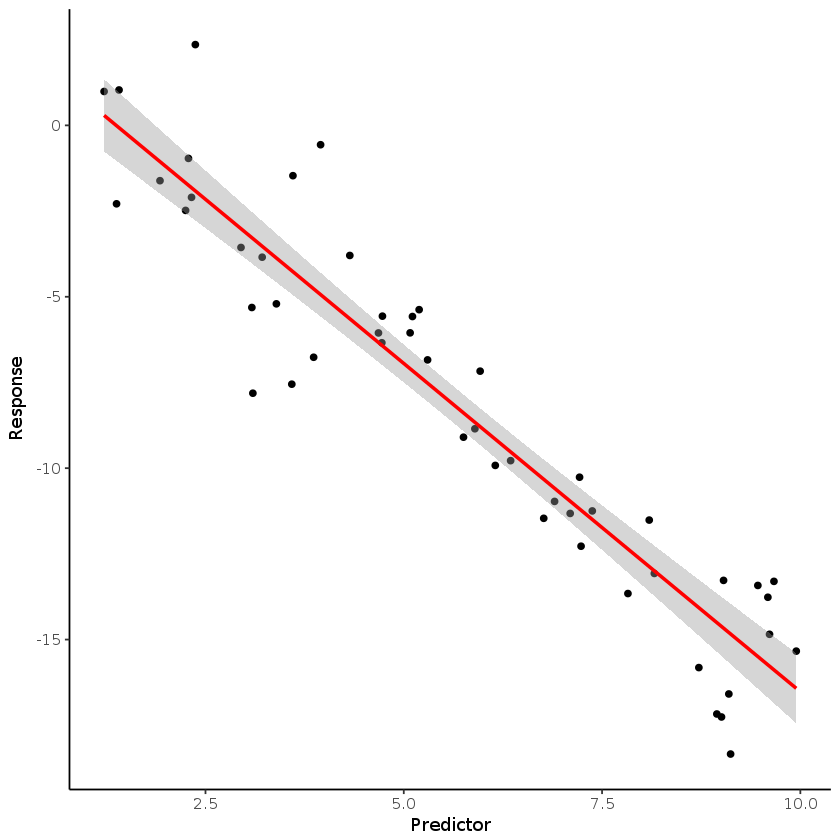

In [29]:
ggplot(df1, aes(x = V1, y = response)) + 
    geom_point() + 
        xlab("Predictor") + ylab("Response") + 
            geom_smooth(method = lm, se = TRUE, col = "red") + 
                theme_classic()

# Assigment 2

# Packages

In [30]:
library(thematicmaps)
library(tidyverse)

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [31]:
map_municipal <- read.csv2("nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

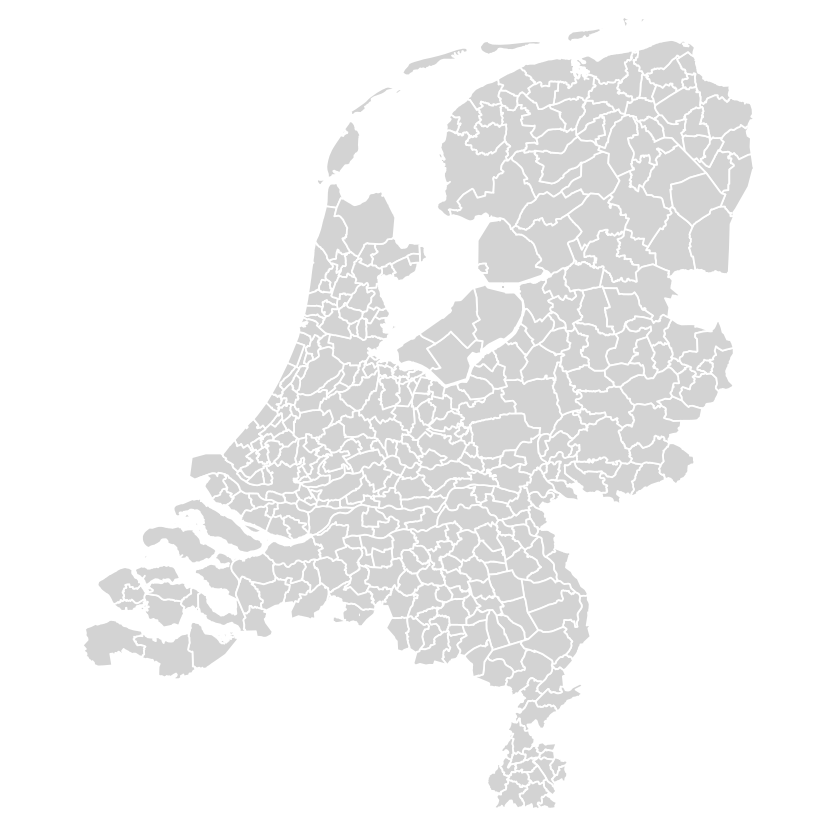

In [32]:
AddMapLayer(MapPlot(), map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [33]:
pc4_locations <- read.csv2("nld_pc4_locations.csv", stringsAsFactors = FALSE, dec = ".") %>%
    mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [34]:
schools <- read.csv2("schools.csv", stringsAsFactors = FALSE, dec = ".")


str(schools)

'data.frame':	1603 obs. of  31 variables:
 $ PROVINCIE                                 : chr  "                    " "Drenthe" "Drenthe" "Drenthe" ...
 $ BEVOEGD.GEZAG.NUMMER                      : int  41152 10053 10053 13273 13273 13273 13273 13273 13273 13273 ...
 $ BRIN.NUMMER                               : chr  "23HC" "18BR" "18BR" "20LO" ...
 $ VESTIGINGSNUMMER                          : chr  "23HC04" "18BR00" "18BR01" "20LO00" ...
 $ VESTIGINGSNAAM                            : chr  "RSG Lingecollege" "School voor Praktijkonderwijs Assen" "School voor Praktijkonderwijs Assen" "Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo" ...
 $ STRAATNAAM                                : chr  "                        " "Zwartwatersweg" "Bosrand" "Mr Groen v Prinstererln" ...
 $ HUISNUMMER.TOEVOEGING                     : chr  "            " "202" "2" "98" ...
 $ POSTCODE                                  : chr  "       " "9406 NN" "9401 SL" "9402 KG" ...
 $ PLAATSNAA

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [35]:
schools1 <- data.frame(schools)
    PC4 <- substr(schools$POSTCODE, start = 1, stop = 4)
PC4
schools1$DENOMINATIE



[1] "    " "9406" "9401" "9402" "9331" "9411" "9461" "9402" "9402" "9403"
  [11] "9406" "7905" "7905" "7905" "7905" "7905" "9404" "9761" "7812" "7944"
  [21] "7944" "7824" "9301" "9301" "7902" "7903" "7822" "7825" "7943" "7943"
  [31] "7943" "7981" "7943" "7742" "9402" "7822" "7891" "7822" "7811" "7861"
  [41] "9531" "7822" "9471" "7941" "7941" "9406" "9405" "9404" "9411" "9422"
  [51] "7944" "8251" "8251" "8251" "8251" "3891" "8225" "8322" "1333" "1335"
  [61] "1335" "8321" "8303" "8303" "8232" "1362" "3891" "8302" "8302" "8302"
  [71] "8302" "8304" "8251" "8251" "8251" "8224" "8223" "8233" "1324" "1326"
  [81] "1325" "1314" "1353" "1363" "1323" "1356" "1336" "1329" "8302" "8302"
  [91] "8302" "8321" "1314" "1325" "1324" "1363" "1362" "9163" "8891" "8899"
 [101] "9201" "9251" "9231" "9201" "9202" "9202" "9251" "9201" "8935" "9291"
 [111] "8911" "8931" "8924" "8915" "8915" "9076" "9103" "8924" "8935" "8925"
 [121] "8862" "8801" "8862" "8471" "9285" "8602" "8448" "8934" "8608" "9285"
 [131] "9291" "9103" "9101" "9101" "9172" "9101" "8601" "8601" "8601" "8723"
 [141] "8731" "8561" "8701" "8701" "9202" "9202" "9251" "8434" "9202" "9251"
 [151] "8446" "8446" "8447" "8503" "8802" "8531" "8561" "8472" "9076" "8933"
 [161] "8921" "8924" "9076" "8933" "8924" "8932" "8601" "8601" "8602" "8431"
 [171] "8861" "8446" "8441" "8441" "8446" "8503" "9001" "8441" "8401" "9203"
 [181] "8924" "8601" "9101" "9254" "9104" "9166" "6922" "6922" "6922" "6832"
 [191] "6832" "6942" "6843" "6904" "6942" "6902" "6903" "6828" "6835" "6661"
 [201] "6835" "6661" "6846" "6824" "6822" "6812" "6883" "6825" "6827" "6706"
 [211] "6706" "4041" "6709" "4103" "4103" "4103" "4103" "4191" "3844" "7206"
 [221] "7201" "7314" "7312" "7322" "7391" "7322" "7312" "4041" "6532" "7141"
 [231] "7131" "3842" "6865" "7152" "7161" "7161" "6823" "6523" "6562" "6523"
 [241] "6717" "6717" "6717" "6825" "7231" "7231" "6717" "6717" "3862" "6881"
 [251] "4102" "4102" "8181" "6891" "6953" "6952" "7005" "7271" "7391" "7005"
 [261] "4006" "4001" "4001" "4001" "3842" "3844" "3842" "3843" "6543" "6681"
 [271] "6602" "6524" "7329" "7314" "7313" "7312" "6522" "6533" "6532" "6537"
 [281] "6533" "6535" "6533" "6524" "6525" "6525" "6603" "6602" "6541" "6541"
 [291] "6651" "6658" "6651" "6511" "6531" "6546" "6546" "6663" "6663" "3863"
 [301] "3863" "3863" "6822" "6883" "6826" "6826" "6883" "6826" "8091" "6671"
 [311] "6681" "6661" "6851" "6681" "6661" "3771" "3771" "3772" "7333" "5301"
 [321] "3844" "3871" "4041" "3772" "6717" "7316" "7329" "7316" "7331" "7316"
 [331] "7316" "5301" "5301" "3771" "3772" "7241" "7271" "7271" "8162" "8162"
 [341] "6715" "7122" "7091" "7101" "7122" "7002" "7251" "7251" "7002" "7008"
 [351] "7001" "7008" "7204" "7064" "7064" "7071" "7102" "7101" "7009" "7201"
 [361] "7203" "7204" "7206" "7204" "7003" "7161" "7102" "8082" "8081" "8071"
 [371] "8081" "4191" "3851" "3881" "6574" "7331" "6713" "6713" "7201" "7204"
 [381] "7204" "7316" "3888" "7316" "9646" "9641" "9641" "9646" "9989" "9964"
 [391] "9981" "9725" "9951" "9821" "9951" "9843" "9727" "9751" "9503" "9675"
 [401] "9641" "9501" "9675" "9591" "9502" "9501" "9501" "9731" "9726" "9732"
 [411] "9743" "9951" "9602" "9721" "9351" "9351" "9861" "9351" "9675" "9671"
 [421] "9665" "9695" "9946" "9671" "9673" "9675" "9675" "9721" "9801" "9741"
 [431] "9731" "9721" "9721" "9561" "9561" "9741" "9743" "9713" "9732" "9711"
 [441] "9711" "9711" "9731" "9731" "9732" "9722" "9751" "9751" "9721" "9721"
 [451] "9603" "9601" "9902" "9932" "9628" "9902" "9901" "5963" "6042" "6415"
 [461] "6031" "6045" "5911" "5912" "5922" "6134" "6137" "6131" "6163" "6165"
 [471] "6135" "6137" "6135" "6163" "6121" "6135" "6135" "6135" "6045" "6042"
 [481] "6043" "6043" "6042" "6071" "5953" "6101" "6101" "6085" "6093" "6591"
 [491] "6584" "6271" "6417" "6417" "6006" "6004" "6006" "6413" "6431" "6413"
 [501] "6415" "6432" "6431" "6004" "6004" "6443" "6164" "6231" "6301" "6216"
 [511] "6301" "6171" "5981" "5802" "5961" "5963" "6216" "6228" "6226" "6225"

[1] "Openbaar"                       "Openbaar"                      
   [3] "Openbaar"                       "Openbaar"                      
   [5] "Openbaar"                       "Openbaar"                      
   [7] "Openbaar"                       "Openbaar"                      
   [9] "Openbaar"                       "Openbaar"                      
  [11] "Openbaar"                       "Openbaar"                      
  [13] "Openbaar"                       "Openbaar"                      
  [15] "Openbaar"                       "Openbaar"                      
  [17] "Algemeen bijzonder"             "Algemeen bijzonder"            
  [19] "Algemeen bijzonder"             "Algemeen bijzonder"            
  [21] "Algemeen bijzonder"             "Rooms-Katholiek"               
  [23] "Algemeen bijzonder"             "Algemeen bijzonder"            
  [25] "Protestants-Christelijk"        "Protestants-Christelijk"       
  [27] "Protestants-Christelijk"        "Algemeen bijzonder"            
  [29] "Openbaar"                       "Openbaar"                      
  [31] "Openbaar"                       "Openbaar"                      
  [33] "Openbaar"                       "Openbaar"                      
  [35] "Gereformeerd"                   "Openbaar"                      
  [37] "Openbaar"                       "Openbaar"                      
  [39] "Openbaar"                       "Openbaar"                      
  [41] "Openbaar"                       "Openbaar"                      
  [43] "Openbaar"                       "Gereformeerd"                  
  [45] "Gereformeerd"                   "Protestants-Christelijk"       
  [47] "Protestants-Christelijk"        "Protestants-Christelijk"       
  [49] "Protestants-Christelijk"        "Protestants-Christelijk"       
  [51] "Protestants-Christelijk"        "Openbaar"                      
  [53] "Openbaar"                       "Openbaar"                      
  [55] "Openbaar"                       "Openbaar"                      
  [57] "Algemeen bijzonder"             "Reformatorisch"                
  [59] "Algemeen bijzonder"             "Algemeen bijzonder"            
  [61] "Algemeen bijzonder"             "Protestants-Christelijk"       
  [63] "Protestants-Christelijk"        "Samenwerking PC, RK"           
  [65] "Samenwerking PC, RK"            "Samenwerking PC, RK"           
  [67] "Samenwerking PC, RK"            "Rooms-Katholiek"               
  [69] "Openbaar"                       "Openbaar"                      
  [71] "Openbaar"                       "Openbaar"                      
  [73] "Protestants-Christelijk"        "Protestants-Christelijk"       
  [75] "Protestants-Christelijk"        "Samenwerking PC, RK"           
  [77] "Algemeen bijzonder"             "Algemeen bijzonder"            
  [79] "Openbaar"                       "Openbaar"                      
  [81] "Openbaar"                       "Openbaar"                      
  [83] "Openbaar"                       "Openbaar"                      
  [85] "Openbaar"                       "Openbaar"                      
  [87] "Overige"                        "Openbaar"                      
  [89] "Protestants-Christelijk"        "Protestants-Christelijk"       
  [91] "Protestants-Christelijk"        "Protestants-Christelijk"       
  [93] "Samenwerking PC, RK"            "Samenwerking PC, RK"           
  [95] "Samenwerking PC, RK"            "Samenwerking PC, RK"           
  [97] "Samenwerking PC, RK"            "Openbaar"                      
  [99] "Openbaar"                       "Openbaar"                      
 [101] "Openbaar"                       "Openbaar"                      
 [103] "Openbaar"                       "Openbaar"                      
 [105] "Openbaar"                       "Openbaar"                      
 [107] "Openbaar"                       "Openbaar"                      
 [109] "Openbaar"                       "Openbaar"           

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [46]:
school_loc <- cbind(PC4, schools1)
  new_school_loc  <- subset(school_loc, school_loc$DENOMINATIE ==  "Rooms-Katholiek" | school_loc$DENOMINATIE == "Protestants-Christelijk")
head(new_school_loc)

,PC4,PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
22,7824,Drenthe,35647,00PF,00PF00,Carmelcollege Emmen,Wendeling,59,7824 TB,EMMEN,...,5,Zuid- en Midden-Drenthe,8,Zuidoost-Drenthe,8,Zuidoost-Drenthe,4,Assen-Hoogeveen-Emmen,8,Zuid-Oost Drenthe
25,7902,Drenthe,41271,02VA,02VA00,Roelof van Echten College,Sportveldenweg,20,7902 NX,HOOGEVEEN,...,5,Zuid- en Midden-Drenthe,9,Zuidwest-Drenthe,9,Zuidwest-Drenthe,4,Assen-Hoogeveen-Emmen,9,Zuid-West Drenthe
26,7903,Drenthe,41271,02VA,02VA01,St. Roelof van Echten College voor Christelijk Voortgezet Onderwijs Hoogeveen,Voltastraat,27,7903 AA,HOOGEVEEN,...,5,Zuid- en Midden-Drenthe,9,Zuidwest-Drenthe,9,Zuidwest-Drenthe,4,Assen-Hoogeveen-Emmen,9,Zuid-West Drenthe
27,7822,Drenthe,41509,16VP,16VP00,Hondsrug College Christelijke SGM voor LYC HAVO MAVO VBO LWOO,Emmalaan,25,7822 JB,EMMEN,...,5,Zuid- en Midden-Drenthe,8,Zuidoost-Drenthe,8,Zuidoost-Drenthe,4,Assen-Hoogeveen-Emmen,8,Zuid-Oost Drenthe
46,9406,Drenthe,46594,02EB,02EB00,Christelijk Scholengemeenschap Vincent van Gogh Lyceum Havo Mavo Vbo Lwoo,Selma Lagerloflaan,3,9406 KB,ASSEN,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
47,9405,Drenthe,46594,02EB,02EB04,Christelijk Scholengemeenschap Vincent van Gogh Lyceum Havo Mavo Vbo Lwoo,Salland,4,9405 GM,ASSEN,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


In [ ]:
 AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(new_school_loc)

#i dont know why it doesnt work, and i have no more time to do.

End of notebook